In [9]:
%matplotlib inline

import numpy.random as npr
import math
import matplotlib.pyplot as plt

from tqdm import tqdm

In [20]:
import sys
sys.path.append("/home/hofmann/nngame/package/src/rlbase/")
from importlib import reload

import env_gridworld
import misc
import policy
reload(policy)
reload(env_gridworld)

import numpy as np
import tabulate as tb
import misc
reload(misc)

<module 'misc' from '/home/hofmann/nngame/package/src/rlbase/misc.py'>

# Figure 4.1

In [ ]:
# Gridworld
env = env_gridworld.GridworldEx41Environment()

pi = policy.UniformPolicy(env.states,env.actions)

_, arr_v = misc.evaluate_policy_iterative(env,pi)

for (i,x) in enumerate(arr_v):
  if i in [1,2,3,10,425]:
    print("Iteration: ",i)
    env.pretty_print(env.reshape(x))

# Exercise 4.1
Calculate the q-values for (s,a)=((3,1),"down") and (s,a)=((3,2),"down")

In [ ]:
q = misc.get_action_value_function(env,arr_v[-1])
print('q((3,1),"down")',round(q((3,1),"down"),1))
print('q((3,2),"down")',round(q((3,2),"down"),1))

In [ ]:
improved_policy = rl_functions.improve_policy_from_value_function(states,actions,rewards,state_transition,v,gamma)
v = rl_functions.evaluate_policy_linear_system(states,actions,rewards,state_transition,improved_policy,gamma,terminal_states)

print(tb.tabulate(np.round(np.array(v.tolist()+[v[0]]).reshape((4,4)),1)))
improved_policy = rl_functions.improve_policy_from_value_function(states,actions,rewards,state_transition,v,gamma)

tmp = [""]*15
for s in states:
  for a in actions:
    if improved_policy(a,s)>0:
      tmp[s] += a[0]
print(tb.tabulate(np.array(tmp+[tmp[0]]).reshape((4,4))))

# Example 4.2

Jack's Car Rental

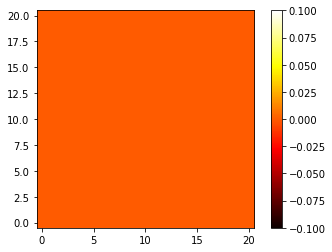

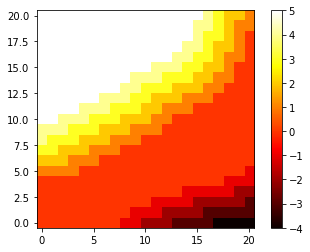

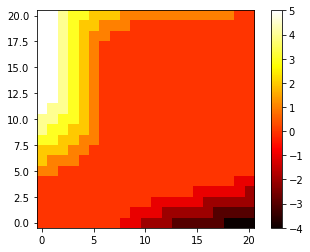

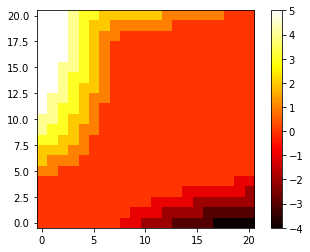

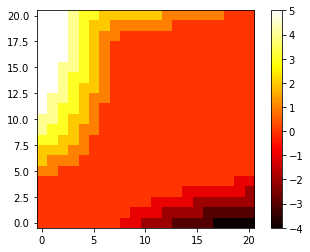

In [11]:
import env_car_rental
reload(env_car_rental)
import numpy as np
import matplotlib.pyplot as plt

# Discount parameter
gamma = 0.9

env = env_car_rental.CarRentalEnvironment()
env.env_init({"nmax":20, ""})
    
pi = policy.DeterministicPolicy(env.states,env.actions,{s:[0] for s in env.states})

# Improve policy and visualize policy function
for i in range(5):
    arr = np.zeros((env.nmax+1,env.nmax+1))
    for i in range(env.nmax+1):
      for j in range(env.nmax+1):
        arr[i,j] = pi.get((i,j))
    plt.imshow(arr, cmap='hot', interpolation='nearest',origin="lower")
    plt.colorbar()
    plt.show()
    v = misc.evaluate_policy_linear_system_two_args(env,pi,gamma=gamma)
    pi = misc.improve_policy_from_value_function_two_args(env, v, gamma)

# Example 4.3 Gambler's Problem

AttributeError: module 'misc' has no attribute 'get_deterministic_policy_from_policy_function'

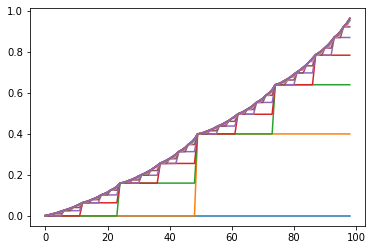

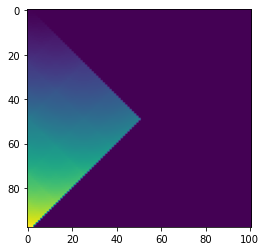

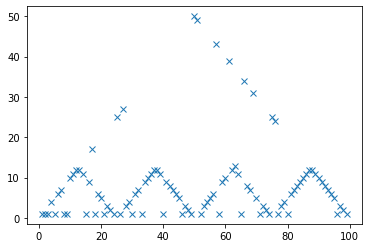

In [60]:
import env_gambler
reload(misc)
reload(env_gambler)

N = 100

env = env_gambler.GamblerEnvironment()
env.env_init({"n":N})

# Evaluate policy and visualize value function
v, arr_v = misc.value_iteration_two_args(env,tol=1e-4)
for i in arr_v:
  plt.plot([i[j] for j in range(1,N)])

plt.figure()
arr = np.zeros((N+1,N+1))
for s in range(1,N):
  for a in env.actions:
    v1 = 0
    for (s_prime, r, p) in env.env_state_transition_two_args(s,a):
      v1 += p * (r + v[s_prime])
    arr[s,a] = v1
plt.imshow(arr[1:99,:])

pi = misc.improve_policy_from_value_function_two_args(env,v,tol=1e-3)

plt.figure()
aa = []
ss = []
for s in range(1,N):
  for a in range(1,N):
    if pi.prob(a,s)>0:
      aa.append(a)
      ss.append(s)
      break
plt.plot(ss,aa,'x')

pol = misc.get_deterministic_policy_from_policy_function(states,actions,policy)